In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('This Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

This Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam WHERE vam.grade = %s AND vam.year = %s ORDER BY vam.school_id;"

data2010 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['4th Grade','2010'], parse_dates=None, columns=None, chunksize=None)

data2011 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['4th Grade','2011'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

In [4]:
data2010[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,4th Grade,2010,45.0,0.2,-0.7 to 1.1,59,yellow,45.0,0.5,-0.2 to 1.2,74,yellow
1,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,4th Grade,2010,42.5,0.8,-0.1 to 1.7,84,yellow,42.5,0.2,-0.4 to 0.9,60,yellow
2,CATALYST CHTR - HOWLAND,400020,Austin-North Lawndale,4th Grade,2010,29.5,1.3,0.3 to 2.3,91,green,29.5,0.8,0 to 1.6,82,green
3,CATALYST CHTR - CIRCLE ROCK,400021,Austin-North Lawndale,4th Grade,2010,27.0,0.2,-0.9 to 1.3,58,yellow,27.0,0.3,-0.5 to 1.2,65,yellow


In [5]:
data2011[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,4th Grade,2011,46.0,-0.1,-1 to 0.7,39,yellow,46.0,-1.0,-1.7 to -0.4,14,red
1,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,4th Grade,2011,72.8,-0.4,-1.1 to 0.3,32,yellow,72.8,0.2,-0.4 to 0.7,57,yellow
2,CATALYST CHTR - HOWLAND,400020,Austin-North Lawndale,4th Grade,2011,42.1,-1.3,-2.2 to -0.4,9,red,42.1,-0.8,-1.5 to -0.1,21,red
3,CATALYST CHTR - CIRCLE ROCK,400021,Austin-North Lawndale,4th Grade,2011,47.8,-1.4,-2.2 to -0.6,8,red,47.8,-0.9,-1.6 to -0.3,16,red


In [6]:
left = data2010
right = data2011
result = pd.merge(left, right, on='school_id')
result.shape

(451, 29)

In [7]:
result[:4]

,school_name_x,school_id,network_x,grade_x,year_x,reading_studentsnumber_x,reading_vam_x,reading_confidence_x,reading_percentile_x,reading_color_x,math_studentsnumber_x,math_vam_x,math_confidence_x,math_percentile_x,math_color_x,school_name_y,network_y,grade_y,year_y,reading_studentsnumber_y,reading_vam_y,reading_confidence_y,reading_percentile_y,reading_color_y,math_studentsnumber_y,math_vam_y,math_confidence_y,math_percentile_y,math_color_y
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,4th Grade,2010,45.0,0.2,-0.7 to 1.1,59,yellow,45.0,0.5,-0.2 to 1.2,74,yellow,"LOCKE, A CHTR",Garfield-Humboldt,4th Grade,2011,46.0,-0.1,-1 to 0.7,39,yellow,46.0,-1.0,-1.7 to -0.4,14,red
1,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,4th Grade,2010,42.5,0.8,-0.1 to 1.7,84,yellow,42.5,0.2,-0.4 to 0.9,60,yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,Burnham Park,4th Grade,2011,72.8,-0.4,-1.1 to 0.3,32,yellow,72.8,0.2,-0.4 to 0.7,57,yellow
2,CATALYST CHTR - HOWLAND,400020,Austin-North Lawndale,4th Grade,2010,29.5,1.3,0.3 to 2.3,91,green,29.5,0.8,0 to 1.6,82,green,CATALYST CHTR - HOWLAND,Austin-North Lawndale,4th Grade,2011,42.1,-1.3,-2.2 to -0.4,9,red,42.1,-0.8,-1.5 to -0.1,21,red
3,CATALYST CHTR - CIRCLE ROCK,400021,Austin-North Lawndale,4th Grade,2010,27.0,0.2,-0.9 to 1.3,58,yellow,27.0,0.3,-0.5 to 1.2,65,yellow,CATALYST CHTR - CIRCLE ROCK,Austin-North Lawndale,4th Grade,2011,47.8,-1.4,-2.2 to -0.6,8,red,47.8,-0.9,-1.6 to -0.3,16,red


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     57.73
Date:                Mon, 17 Aug 2015   Prob (F-statistic):           1.77e-13
Time:                        16:05:13   Log-Likelihood:                -630.10
No. Observations:                 451   AIC:                             1264.
Df Residuals:                     449   BIC:                             1272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0181      0.046     -0.391      0.696        -0.109     0.073
x              0.3369      0.044      7.598      0.000         0.250     0.424
==============================================================================
Omnibus:                       20.192   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.003
Skew:                          -0.340   Prob(JB):                     1.85e-07
Kurtosis:                       4.090   Cond. No.                         1.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

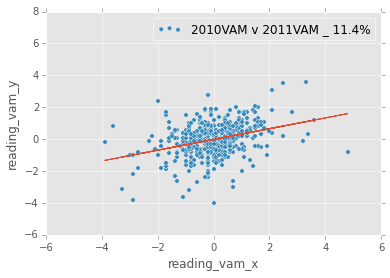

In [9]:
# different way, assign x and y
x = result['reading_vam_x']
y = result['reading_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam_x', y='reading_vam_y',label="2010VAM v 2011VAM _ 11.4%")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     81.93
Date:                Mon, 17 Aug 2015   Prob (F-statistic):           4.31e-18
Time:                        16:05:38   Log-Likelihood:                -614.92
No. Observations:                 451   AIC:                             1234.
Df Residuals:                     449   BIC:                             1242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0172      0.045      0.385      0.701        -0.071     0.105
x              0.3920      0.043      9.052      0.000         0.307     0.477
==============================================================================
Omnibus:                       11.900   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.321
Skew:                           0.258   Prob(JB):                     0.000471
Kurtosis:                       3.740   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

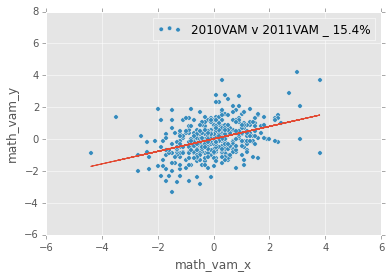

In [11]:
# different way, assign x and y
x = result['math_vam_x']
y = result['math_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='math_vam_x', y='math_vam_y',label="2010VAM v 2011VAM _ 15.4%")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()